In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
aggregated_data = pd.read_csv('../metrics_jac/Test_aggregated_metrics.csv', index_col='Model').drop(columns=['Epsilons Range', 'FGSM Accuracy - Range', 'Random Accuracy - Range'])
# reorder columns so that 0.03 comes before 0.06
columns = aggregated_data.columns.tolist()
columns[1], columns[2], columns[4], columns[5] = columns[2], columns[1], columns[5], columns[4]
aggregated_data = aggregated_data[columns]
# group metrics together
aggregated_data.columns=pd.MultiIndex.from_arrays([['Clean Accuracy', 'PGD Accuracy', 'PGD Accuracy', 'PGD Accuracy', 'SPSA Accuracy', 'SPSA Accuracy', 'Gradient Norm', 'FGSM PGD Cosine Similarity', 'FGSM PGD Cosine Similarity', 'Linearization Error', 'Linearization Error', 'PGD Collinearity', 'Gradient Information'],
                                     ['-', '8/255', '16/255', 'Unbounded', '8/255', '16/255', '-', '8/255', '16/255', '8/255', '16/255', '-', '-']])


In [92]:
aggregated_data

Clean Accuracy PGD Accuracy         \
                                                       -        8/255 16/255   
Model                                                                          
Normal                                             84.94         0.00   0.00   
Step-ll eps: 0.06                                  71.18         5.04   1.04   
Step-ll eps: 0.03                                  77.82        26.16   4.58   
FGSM eps: 0.06                                     71.10         0.00   0.00   
FGSM eps: 0.03 (catastrophic overfitting)          78.84         0.20   0.02   
FGSM eps: 0.03                                     69.64        32.60   8.38   
PGD eps: 0.06                                      52.48        37.60  27.08   
PGD eps: 0.03                                      68.38        35.64  11.88   
Jacobian Regularization 0.1                        78.88         8.88   0.14   
Jacobian Regularization 0.5                        75.58         8.54   0.26   
Jacobian Regularization 1                          63.64        14.26   1.02   
STEP                                               93.34        26.44   8.08   
CURE                                               81.00        42.54  11.48   

                                                    SPSA Accuracy         \
                                          Unbounded         8/255 16/255   
Model                                                                      
Normal                                         0.00          12.2   10.4   
Step-ll eps: 0.06                              0.00          20.6   11.4   
Step-ll eps: 0.03                              0.00          48.0   40.6   
FGSM eps: 0.06                                 0.00           2.6    2.0   
FGSM eps: 0.03 (catastrophic overfitting)      0.00          10.2    4.8   
FGSM eps: 0.03                                 0.00          49.8   38.2   
PGD eps: 0.06                                  0.00          47.8   42.0   
PGD eps: 0.03                                  0.00          53.0   39.0   
Jacobian Regularization 0.1                    0.00          35.6   22.8   
Jacobian Regularization 0.5                    0.00          34.2   19.6   
Jacobian Regularization 1                      0.00          35.6   21.2   
STEP                                           0.34          48.6   46.2   
CURE                                           0.00          65.6   50.2   

                                          Gradient Norm  \
                                                      -   
Model                                                     
Normal                                         0.121433   
Step-ll eps: 0.06                              0.103275   
Step-ll eps: 0.03                              0.020521   
FGSM eps: 0.06                                 0.344842   
FGSM eps: 0.03 (catastrophic overfitting)      0.183621   
FGSM eps: 0.03                                 0.009141   
PGD eps: 0.06                                  0.003093   
PGD eps: 0.03                                  0.007933   
Jacobian Regularization 0.1                    0.020018   
Jacobian Regularization 0.5                    0.012912   
Jacobian Regularization 1                      0.010392   
STEP                                           0.048409   
CURE                                           0.004520   

                                          FGSM PGD Cosine Similarity  \
                                                               8/255   
Model                                                                  
Normal                                                      0.320447   
Step-ll eps: 0.06                                           0.238119   
Step-ll eps: 0.03                                           0.653772   
FGSM eps: 0.06                                              0.080957   
FGSM eps: 0.03 (catastrophic overfitting)                   0.073949   
FGSM eps: 0.03         

In [91]:
print(aggregated_data.reset_index().to_latex(index=False))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
                                     Model & Clean Accuracy & \multicolumn{3}{l}{PGD Accuracy} & \multicolumn{2}{l}{SPSA Accuracy} & Gradient Norm & \multicolumn{2}{l}{FGSM PGD Cosine Similarity} & \multicolumn{2}{l}{Linearization Error} & PGD Collinearity & Gradient Information \\
                                           &              - &        8/255 & 16/255 & Unbounded &         8/255 & 16/255 &             - &                      8/255 &    16/255 &               8/255 &      16/255 &                - &                    - \\
\midrule
                                    Normal &          84.94 &         0.00 &   0.00 &      0.00 &          12.2 &   10.4 &      0.121433 &                   0.320447 &  0.193468 &            3.978243 &   18.767652 &         0.247037 &             0.566989 \\
                         Step-ll eps: 0.06 &          71.18 &         5.04 &   1.04 &      0.00 &          20.6 &   11.4 &      0.103275 &           

In [90]:
benchmarks = pd.read_csv('../metrics_jac/Test_benchmarks.csv').drop(columns=['Unnamed: 0'])

In [91]:
benchmarks

,Epsilons Range,FGSM Accuracy - Range,Random Accuracy - Range,Model
0,0.006,29.52,85.66,Normal
1,0.012,13.18,84.90,Normal
2,0.018,8.58,83.94,Normal
3,0.024,5.46,83.22,Normal
4,0.030,4.62,82.56,Normal
...,...,...,...,...
242,0.090,6.74,76.50,CURE
243,0.096,5.16,76.44,CURE
244,0.102,4.04,76.18,CURE
245,0.108,3.84,74.92,CURE


Text(0.5, 0.98, 'FGSM vs Random Accuracy')

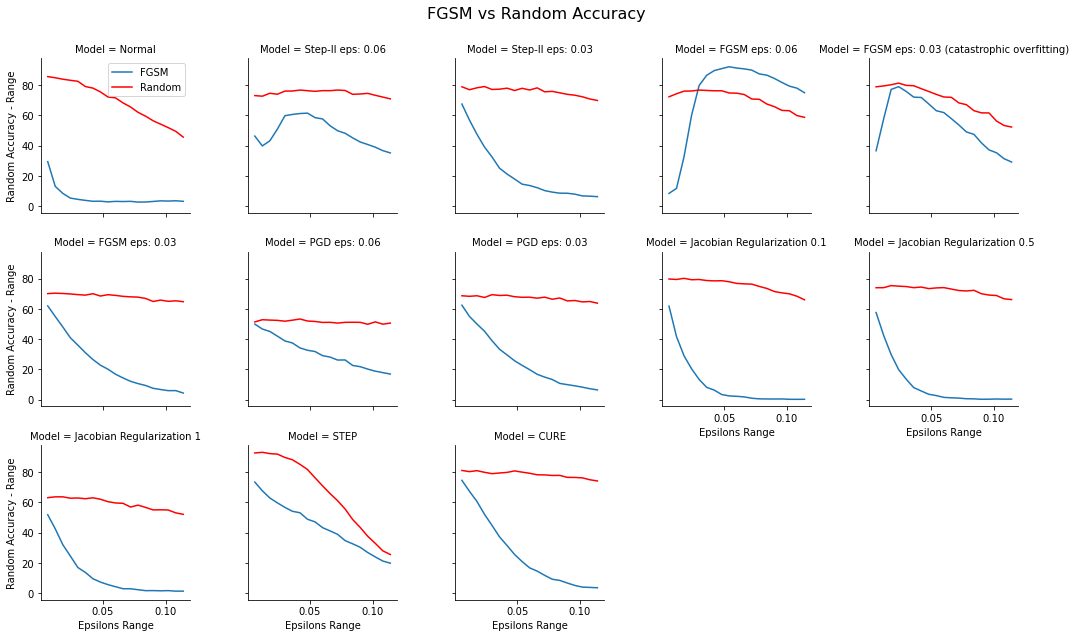

In [48]:
g = sns.FacetGrid(benchmarks, col="Model", col_wrap=5)
g.map(sns.lineplot,"Epsilons Range", "FGSM Accuracy - Range", label='FGSM')
g.map(sns.lineplot,"Epsilons Range", "Random Accuracy - Range", color='red', label='Random')
g.axes[0].legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('FGSM vs Random Accuracy', fontsize=16)

In [92]:
fgsm_pgd = pd.read_csv('../metrics_jac/Test_fgsm_pgd_cos.csv').drop(columns=['Unnamed: 0'])

In [93]:
fgsm_pgd.columns = ['0.03', '0.06', 'Model']

In [83]:
long_form_cos_dif_data = pd.melt(fgsm_pgd, id_vars=['Model'], var_name='epsilon')

In [84]:
long_form_cos_dif_data

,Model,epsilon,value
0,Normal,0.03,0.351380
1,Normal,0.03,0.426741
2,Normal,0.03,0.340506
3,Normal,0.03,0.471558
4,Normal,0.03,0.174271
...,...,...,...
129995,CURE,0.06,0.700489
129996,CURE,0.06,0.618711
129997,CURE,0.06,0.619217
129998,CURE,0.06,0.542015


Text(0.5, 1.0, 'FGSM PGD Cosine Difference')

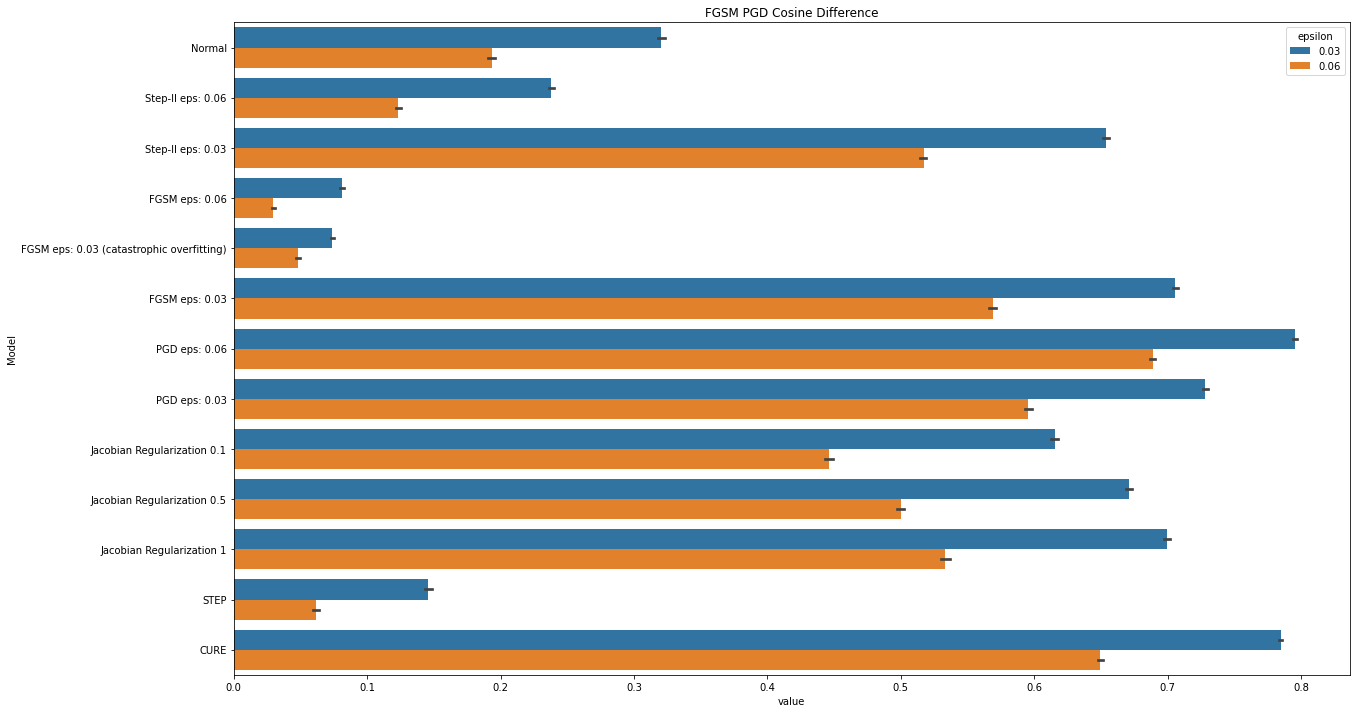

In [95]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(ax=ax, data=long_form_cos_dif_data, y='Model', x='value', hue='epsilon').set_title("FGSM PGD Cosine Difference")

In [168]:
fig.savefig("test.png", bbox_inches='tight')

In [34]:
grad_info = pd.read_csv("../metrics_jac/Test_gradient_information.csv").drop(columns=['Unnamed: 0'])

In [35]:
grad_info

,Gradient Information,Model
0,0.512004,Normal
1,0.723667,Normal
2,0.694727,Normal
3,0.421786,Normal
4,0.599137,Normal
...,...,...
64805,0.553811,CURE
64806,0.599975,CURE
64807,0.700372,CURE
64808,0.627580,CURE


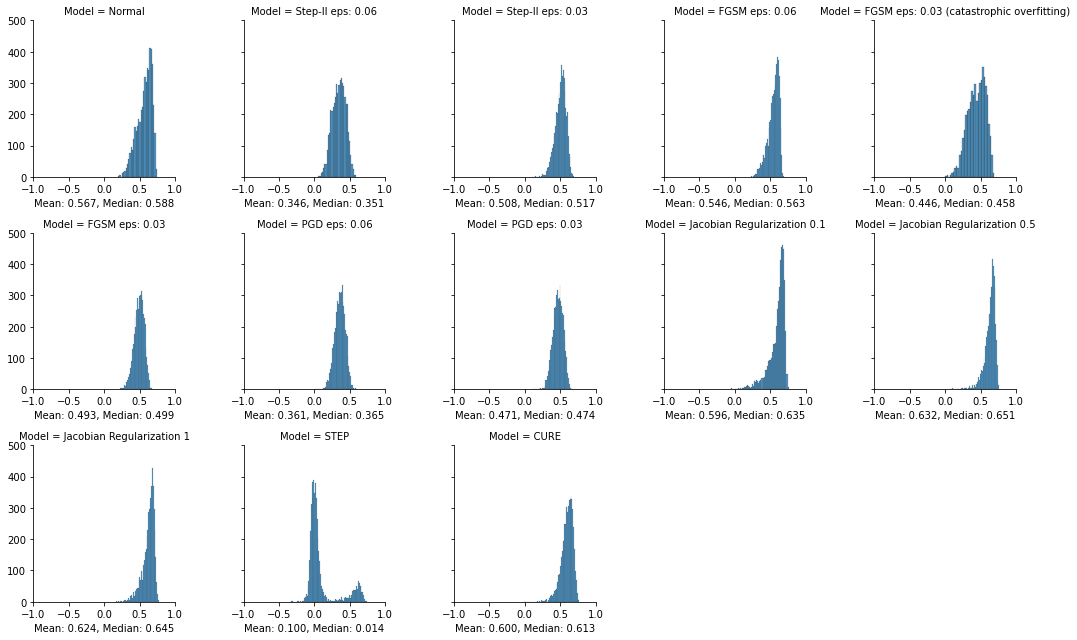

In [36]:
g = sns.FacetGrid(grad_info, col="Model", col_wrap=5, sharex=False, xlim=(-1, 1), ylim = (0, 500))
g.map(sns.histplot, "Gradient Information")
means = grad_info.groupby('Model', sort=False).mean()['Gradient Information'].tolist()
medians = grad_info.groupby('Model', sort=False).median()['Gradient Information'].tolist()
for mean, median, ax in zip(means, medians, g.axes):
    ax.set(xlabel="Mean: {:.3f}, Median: {:.3f}".format(mean, median))
g.fig.tight_layout()

In [2]:
grad_norm = pd.read_csv("../metrics_jac/Test_gradient_norm.csv").drop(columns=['Unnamed: 0'])

In [3]:
grad_norm

,Gradient Norm,Model
0,5.205501e-08,Normal
1,4.494381e-01,Normal
2,7.915409e-11,Normal
3,4.038544e-01,Normal
4,9.042954e-05,Normal
...,...,...
64995,1.013214e-01,CURE
64996,1.050574e-02,CURE
64997,8.032573e-02,CURE
64998,5.132171e-02,CURE


In [8]:
grad_norm[grad_norm['Model'] == 'Normal'].min()

Gradient Norm    8.04094e-16
Model                 Normal
dtype: object

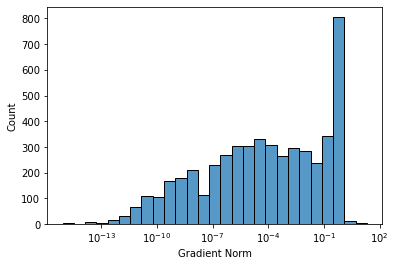

In [27]:
sns.histplot(data=grad_norm[grad_norm['Model'] == 'Normal'], x="Gradient Norm", log_scale=True)

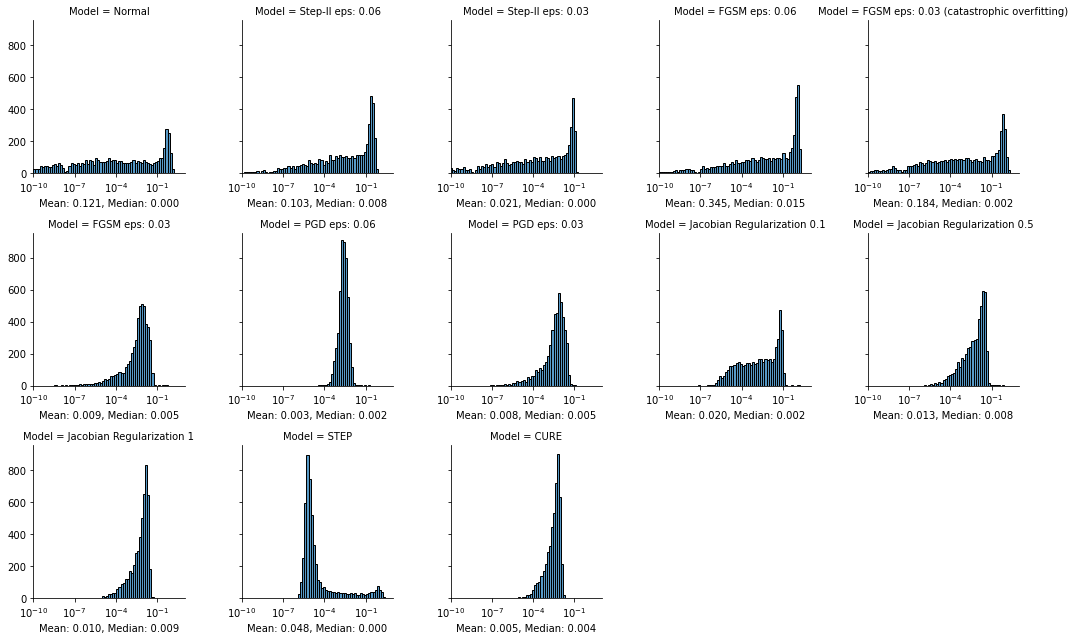

In [44]:
g = sns.FacetGrid(grad_norm, col="Model", col_wrap=5, sharex=False, xlim=(10e-11, 10e0))
g.map(sns.histplot, "Gradient Norm", log_scale=True, binwidth=1.5e-1)
means = grad_norm.groupby('Model', sort=False).mean()['Gradient Norm'].tolist()
medians = grad_norm.groupby('Model', sort=False).median()['Gradient Norm'].tolist()
for mean, median, ax in zip(means, medians, g.axes):
    ax.set(xlabel="Mean: {:.3f}, Median: {:.3f}".format(mean, median))
g.fig.tight_layout()

In [59]:
lin_error = pd.read_csv("../metrics_jac/Test_linearization_error.csv").drop(columns=['Unnamed: 0'])

In [101]:
lin_error[lin_error['Model']=='STEP'].std()

0.03       71.177644
0.06    10946.524473
dtype: float64

In [63]:
lin_error.columns = ['0.03', '0.06', 'Model']
long_form_lin_error_data = pd.melt(lin_error, id_vars=['Model'], var_name='epsilon')

[None]

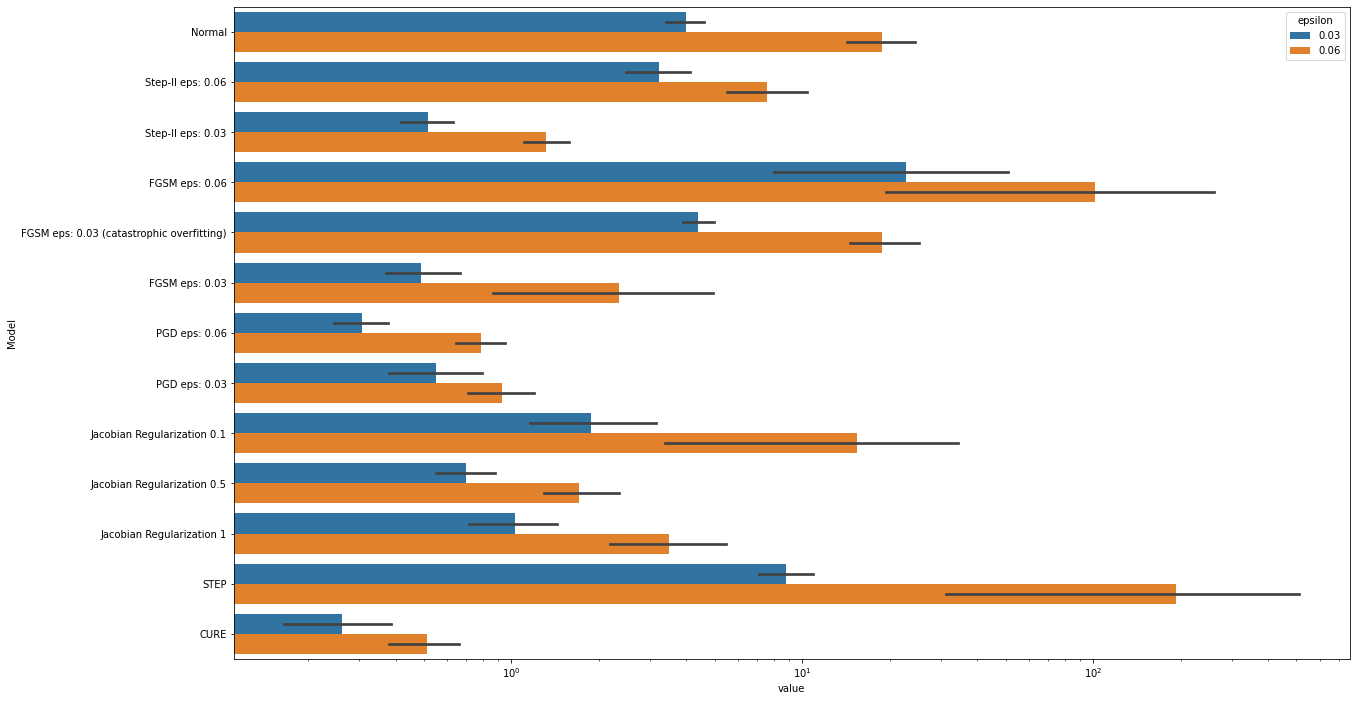

In [102]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(ax=ax, data=long_form_lin_error_data, y='Model', x='value', hue='epsilon').set(xscale='log')

In [103]:
pgd_col = pd.read_csv("../metrics_jac/Test_pgd_collinearity.csv").drop(columns=['Unnamed: 0'])

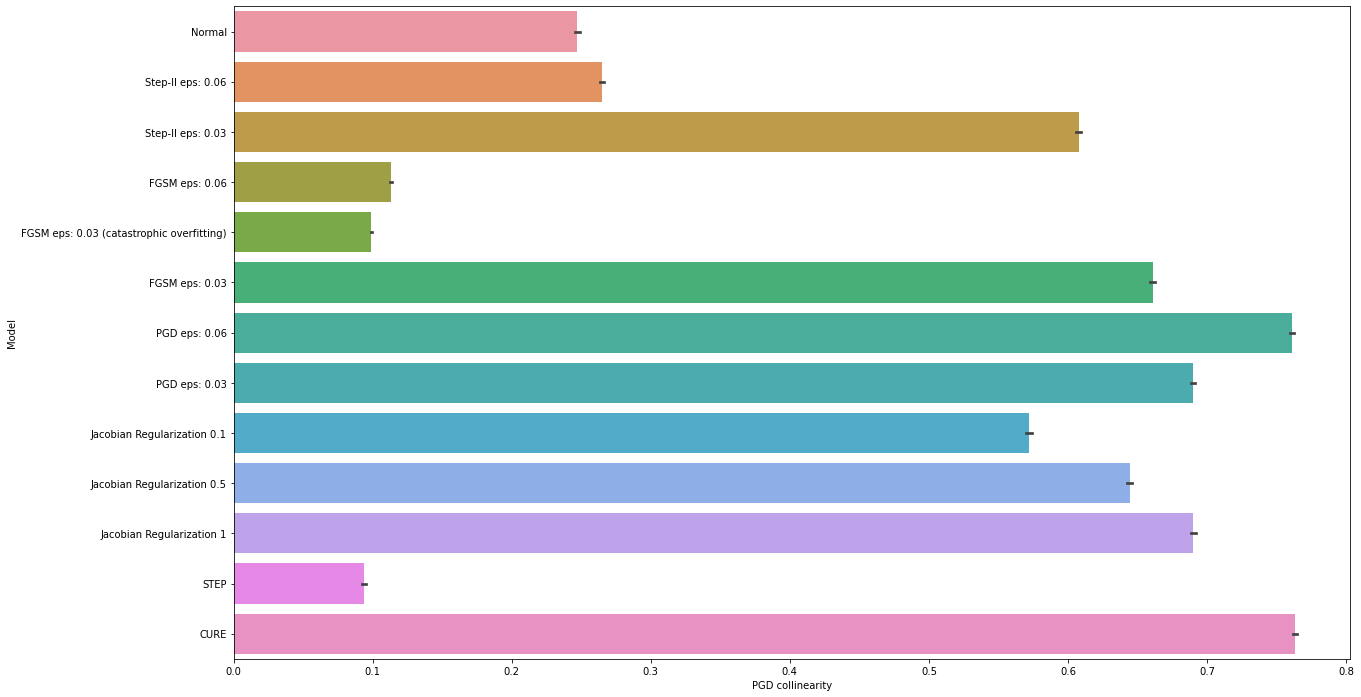

In [111]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(ax=ax, data=pgd_col, y='Model', x='PGD collinearity')